In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('./data/train.csv')

In [29]:
df

,physical_part_type,message_timestamp,weekday,shift,status,physical_part_id,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,...,s8_sensor119_millimeter_step1,s0_sensor57_millimeter_step4,s2_sensor23_millimeter_step1,s2_sensor24_millimeter_step1,s8_sensor120_ml_step1,s7_sensor50_mikrometer_step1,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1
0,type1,2024-09-01 22:05:44,Sunday,Nachtschicht,OK,gAAAAABnRuZgg4Kol8URwnouW9Hv5RymnFqydE_5oyUU_3...,4606.469076,19.525688,374.198570,8858.706709,...,116.978698,25845.838372,NaN,210.307587,158.979496,35265.817888,217.244319,0.0,727.488871,28.207390
1,type2,2024-09-01 22:07:29,Sunday,Nachtschicht,OK,gAAAAABnRuZfvjtCL7qj_QEGC47fSq-n7brsZXoEV--vJ1...,5886.043819,17.540378,360.603884,8851.987083,...,133.967306,NaN,NaN,204.013170,157.362755,34114.280978,225.185946,0.0,741.645333,25.441928
2,type1,2024-09-01 22:07:55,Sunday,Nachtschicht,OK,gAAAAABnRuZfuXBrn_3FsgN6QXP6DQZPeVgP17o6yPbv4h...,4606.469076,20.445584,371.689206,8856.466834,...,155.401053,25845.838372,NaN,184.667093,NaN,35049.904717,223.404646,0.0,721.249812,25.441928
3,type1,2024-09-01 22:08:38,Sunday,Nachtschicht,OK,gAAAAABnRuZheONxFxB3r6dyfTZt1ehdUXm6a-9Opa35i4...,4606.469076,20.822377,372.461318,8854.226959,...,108.880369,25845.838372,NaN,195.774888,NaN,33682.454636,219.470943,0.0,716.725583,26.253564
4,type1,2024-09-01 22:08:56,Sunday,Nachtschicht,OK,gAAAAABnRuZiqnRUJiO7HqQmkkVmg-m21um0EcSExrMdud...,4606.469076,18.592800,373.371307,8851.987083,...,115.292611,25845.838372,NaN,174.577513,154.129274,34546.107319,240.178550,0.0,775.029771,21.271151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44813,type2,2024-11-25 00:50:58,Monday,Nachtschicht,OK,gAAAAABnRuZi5jnV3tyBhqZJ5wT0_a9MxZxEA7mGq_P1im...,5886.043819,19.411351,352.800037,8887.825088,...,173.488172,NaN,NaN,NaN,161.674064,31883.178213,NaN,0.0,813.631668,24.508053
44814,type2,2024-11-25 00:53:59,Monday,Nachtschicht,OK,gAAAAABnRuZf8bCkDO6ZE8b28qWk60DyoNY0wOltoORs0l...,5886.043819,17.181774,336.861440,8892.304838,...,170.805760,NaN,NaN,NaN,154.668187,32027.120327,NaN,0.0,805.203466,23.274894
44815,type1,2024-11-25 00:55:16,Monday,Nachtschicht,OK,gAAAAABnRuZfeD4r4QlWL4sQ9laHYGpg_mg1Mf1e_SeU_6...,4606.469076,17.298710,350.345824,8887.825088,...,174.535590,25845.838372,NaN,NaN,164.368631,32243.033498,NaN,0.0,778.897258,25.138601
44816,type2,2024-11-25 00:56:10,Monday,Nachtschicht,NOK,gAAAAABnRuZgYrpsqvS8pHeiYtpnflcQQb55_vGOikB2du...,5886.043819,19.541280,361.348420,8885.585212,...,172.313020,NaN,NaN,NaN,159.518409,33394.570408,NaN,0.0,728.546957,22.790479


In [30]:
df.columns


Index(['physical_part_type', 'message_timestamp', 'weekday', 'shift', 'status',
       'physical_part_id', 's6_sensor0_millimeter_step1',
       's8_sensor0_millimeter_step1', 's8_sensor1_millimeter_step1',
       's7_sensor0_newton_step1',
       ...
       's8_sensor119_millimeter_step1', 's0_sensor57_millimeter_step4',
       's2_sensor23_millimeter_step1', 's2_sensor24_millimeter_step1',
       's8_sensor120_ml_step1', 's7_sensor50_mikrometer_step1',
       's2_sensor25_millimeter_step1', 's8_sensor121_binaer_step1',
       's8_sensor122_millimeter_step1', 's3_sensor3_newtonmeter_step1'],
      dtype='object', length=376)

In [31]:
df['status']
df['status'].value_counts()


status
OK     42544
NOK     2274
Name: count, dtype: int64

In [32]:
df['physical_part_type']
df['physical_part_type'].value_counts()

physical_part_type
type1    27007
type2    17755
type4       54
Name: count, dtype: int64

In [33]:
df['shift']

0        Nachtschicht
1        Nachtschicht
2        Nachtschicht
3        Nachtschicht
4        Nachtschicht
             ...     
44813    Nachtschicht
44814    Nachtschicht
44815    Nachtschicht
44816    Nachtschicht
44817    Nachtschicht
Name: shift, Length: 44818, dtype: object

In [62]:
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
df = pd.read_csv('./data/train.csv')
# Столбцы для массива мета-данных
meta_columns = ['weekday', 'shift']

# Создание списка сенсорных данных для групп s0, s1, ..., s10
sensor_columns = {f's{i}': [] for i in range(11)}

for col in df.columns:
    for i in range(11):
        if col.startswith(f's{i}_'):
            sensor_columns[f's{i}'].append(col)

for key in sensor_columns:
    sensor_columns[key].sort()

# Кодируем `weekday` и `shift`
label_encoder = LabelEncoder()
df['weekday'] = label_encoder.fit_transform(df['weekday'].fillna('unknown'))
df['shift'] = label_encoder.fit_transform(df['shift'].fillna('unknown'))

# Заполняем `NaN` в числовых колонках
df.fillna(0, inplace=True)

# Кодируем статус
status_mapping = {'OK': 1, 'NOK': 0}  # Бинарный таргет
df['status'] = df['status'].map(status_mapping)
print(df['status'].value_counts())

string_columns = df.select_dtypes(include=['object']).columns.tolist()

# Удаляем эти колонки
df = df.drop(columns=string_columns)
df = df.astype(float)

# Разделяем данные на train и validation с сохранением пропорций классов
train_df, valid_df = train_test_split(df, test_size=0.2, stratify=df['status'], random_state=42)


class CustomDataset(Dataset):
    def __init__(self, dataframe, meta_columns, sensor_columns, target_column):
        # Разделяем мета-данные, сенсорные данные и таргет
        self.meta_data = dataframe[meta_columns].values
        self.sensor_data = []
        self.target = dataframe[target_column].values
        
        for i in range(11):
            if sensor_columns[f's{i}']:
                self.sensor_data.append(dataframe[sensor_columns[f's{i}']].values)
        
        # Преобразуем все данные в float32
        self.meta_data = torch.tensor(self.meta_data, dtype=torch.float32)
        self.sensor_data = [torch.tensor(data, dtype=torch.float32) for data in self.sensor_data]
        self.target = torch.tensor(self.target, dtype=torch.float32)

    def __len__(self):
        return len(self.meta_data)

    def __getitem__(self, idx):
        meta_item = self.meta_data[idx]
        sensor_items = [data[idx] for data in self.sensor_data]
        target_item = self.target[idx]
        return meta_item, sensor_items, target_item

# Создание train и validation датасетов
target_column = 'status'
train_dataset = CustomDataset(train_df, meta_columns, sensor_columns, target_column)
valid_dataset = CustomDataset(valid_df, meta_columns, sensor_columns, target_column)


status
1    42544
0     2274
Name: count, dtype: int64


In [63]:
train_dataset[0]

(tensor([0., 0.]),
 [tensor([-5.3537e+01,  1.5100e+04,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           1.7671e+04,  0.0000e+00,  9.8710e+01,  1.1589e+04, -9.2212e+00,
           0.0000e+00,  8.5290e+03,  0.0000e+00,  5.5477e+01,  2.2222e+03,
           3.4168e+04,  0.0000e+00,  1.0341e+02,  0.0000e+00,  3.9014e+01,
           0.0000e+00,  0.0000e+00,  2.6579e+04,  1.8113e+04,  2.1757e+02,
           1.9339e+03,  0.0000e+00,  3.3463e+01,  0.0000e+00,  1.5967e+04,
           0.0000e+00,  2.8813e+04,  2.8117e+03,  7.6580e+02,  0.0000e+00,
           3.3329e+04,  9.0843e-01,  0.0000e+00,  0.0000e+00,  2.2612e+04,
           6.4159e+01,  0.0000e+00,  4.7231e+02,  0.0000e+00,  6.0219e+01,
           3.0306e+04,  7.3744e+03,  0.0000e+00,  0.0000e+00,  2.0651e+04,
          -6.5576e+00,  0.0000e+00,  0.0000e+00,  2.7707e+04,  4.5734e+01,
           2.1705e+01, -4.3764e+01,  4.8207e+02]),
  tensor([ 1.0010e+04, -4.4896e+00,  2.7635e+00,  3.0468e+01,  1.4525e+04,
           6.1424e+03]),
  ten

In [64]:
len(train_dataset[1][1])

11

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SensorMetaModel(nn.Module):
    def __init__(self, num_meta_features, num_sensors, output_dim):
        """
        :param num_meta_features: Число фичей в мета-данных.
        :param num_sensors: Количество сенсоров.
        :param output_dim: Размер выходного слоя.
        """
        super(SensorMetaModel, self).__init__()
        
        self.sensor_nets = nn.ModuleList([
            nn.Sequential(
                nn.Conv1d(1, 8, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.Conv1d(8, 16, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.AdaptiveMaxPool1d(1) #nn.AdaptiveAvgPool1d(1)
            ) for _ in range(num_sensors)
        ])
        
        self.meta_fc = nn.Sequential(
            nn.Linear(num_meta_features, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        
        self.final_fc = nn.Sequential(
            nn.Linear(16 + num_sensors * 16, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )
    
    def forward(self, meta_data, sensor_data):
        """
        :param meta_data: Мета-данные (тензор размера [batch_size, num_meta_features]).
        :param sensor_data: Список тензоров сенсорных данных (каждый размером [batch_size, sensor_length]).
        :return: Выходной тензор (размер [batch_size, output_dim]).
        """
        sensor_features = []
        for i, sensor in enumerate(sensor_data):
            sensor = sensor.unsqueeze(1) 
            features = self.sensor_nets[i](sensor).squeeze(-1)
            sensor_features.append(features)
        
        sensor_features = torch.cat(sensor_features, dim=1)
        
        meta_features = self.meta_fc(meta_data)
        
        combined_features = torch.cat([sensor_features, meta_features], dim=1)
        
        output = self.final_fc(combined_features)
        return output


Epoch 1/10
Loss: 788.7844
Train F1: 0.8856
Train ROC AUC: 0.5065
Valid F1: 0.2113
Valid ROC AUC: 0.4908
--------------------------------------------------
Epoch 2/10
Loss: 257.2974
Train F1: 0.9008
Train ROC AUC: 0.5076
Valid F1: 0.9555
Valid ROC AUC: 0.5083
--------------------------------------------------
Epoch 3/10
Loss: 125.1156
Train F1: 0.8365
Train ROC AUC: 0.5125
Valid F1: 0.9648
Valid ROC AUC: 0.5111
--------------------------------------------------
Epoch 4/10
Loss: 77.9561
Train F1: 0.8659
Train ROC AUC: 0.5059
Valid F1: 0.9671
Valid ROC AUC: 0.5165
--------------------------------------------------
Epoch 5/10
Loss: 54.3851
Train F1: 0.8701
Train ROC AUC: 0.5118
Valid F1: 0.6110
Valid ROC AUC: 0.4989
--------------------------------------------------
Epoch 6/10
Loss: 41.8282
Train F1: 0.8493
Train ROC AUC: 0.5153
Valid F1: 0.9521
Valid ROC AUC: 0.5095
--------------------------------------------------
Epoch 7/10
Loss: 34.9212
Train F1: 0.8564
Train ROC AUC: 0.5071
Valid F1:

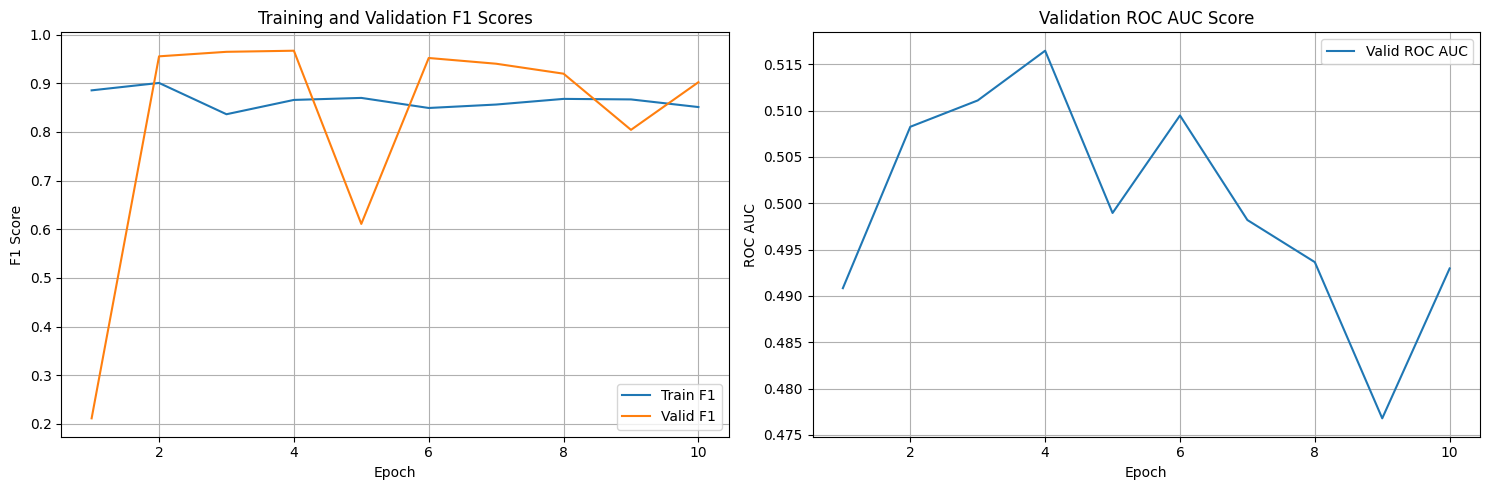

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score, roc_auc_score
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

dataloader = DataLoader(train_dataset, batch_size=4096, shuffle=True)
test_dataloader = DataLoader(valid_dataset, batch_size=4096, shuffle=False)

# Инициализируем модель
model = SensorMetaModel(2, 11, 1)
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([0.2]))  #  Для бинарной классификации с весом 10 для класса 0
optimizer = optim.Adam(model.parameters(), lr=1e-4)

@torch.no_grad()
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_targets = []
    all_probs = []
    
    for batch in dataloader:
        meta_data, sensor_data, targets = batch
            
        meta_data = meta_data.float()
        sensor_data = [s.float() for s in sensor_data]
        targets = targets.float()
            
        outputs = model(meta_data, sensor_data).squeeze(1)
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float()
            
        all_preds.extend(preds.cpu().detach().numpy())
        all_targets.extend(targets.cpu().detach().numpy())
        all_probs.extend(probs.cpu().detach().numpy())
    
    f1 = f1_score(all_targets, all_preds)
    roc_auc = roc_auc_score(all_targets, all_probs)
    
    return f1, roc_auc

# Функция обучения
def train_model(model, train_dataloader, valid_dataloader, criterion, optimizer, epochs=5):
    train_f1_history = []
    valid_f1_history = []
    valid_roc_auc_history = []
    
    for epoch in range(epochs):
        # Обучение
        model.train()
        total_loss = 0
        all_preds = []
        all_targets = []
        all_probs = []

        for batch in train_dataloader:
            meta_data, sensor_data, targets = batch

            meta_data = meta_data.float()
            sensor_data = [s.float() for s in sensor_data]
            targets = targets.float()

            outputs = model(meta_data, sensor_data).squeeze(1)
            loss = criterion(outputs, targets)
            total_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()
            all_preds.extend(preds.cpu().detach().numpy())
            all_targets.extend(targets.cpu().detach().numpy())
            all_probs.extend(probs.cpu().detach().numpy())

        # Вычисляем метрики
        train_f1 = f1_score(all_targets, all_preds)
        train_roc_auc = roc_auc_score(all_targets, all_probs)
        valid_f1, valid_roc_auc = evaluate_model(model, valid_dataloader)
        
        train_f1_history.append(train_f1)
        valid_f1_history.append(valid_f1)
        valid_roc_auc_history.append(valid_roc_auc)
        
        print(f"Epoch {epoch + 1}/{epochs}")
        print(f"Loss: {total_loss:.4f}")
        print(f"Train F1: {train_f1:.4f}")
        print(f"Train ROC AUC: {train_roc_auc:.4f}")
        print(f"Valid F1: {valid_f1:.4f}")
        print(f"Valid ROC AUC: {valid_roc_auc:.4f}")
        print("-" * 50)
    
    # Построение графиков
    plt.figure(figsize=(15, 5))
    
    # График F1
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), train_f1_history, label='Train F1')
    plt.plot(range(1, epochs + 1), valid_f1_history, label='Valid F1')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.title('Training and Validation F1 Scores')
    plt.legend()
    plt.grid(True)
    
    # График ROC AUC
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), valid_roc_auc_history, label='Valid ROC AUC')
    plt.xlabel('Epoch')
    plt.ylabel('ROC AUC')
    plt.title('Validation ROC AUC Score')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Обучение модели
train_model(model, dataloader, test_dataloader, criterion, optimizer, epochs=10)

## for submission

In [67]:
df = pd.read_csv('./train.csv')

In [4]:
df

,physical_part_type,message_timestamp,weekday,shift,physical_part_id,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,s9_sensor0_kilonewton_step1,...,s0_sensor57_millimeter_step4,s2_sensor23_millimeter_step1,s2_sensor24_millimeter_step1,s8_sensor120_ml_step1,s7_sensor50_mikrometer_step1,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1,label
0,type1,2024-09-03 10:01:10,Tuesday,Fruehschicht,gAAAAABnRuZfvC_FyuY9-rngQaMf1ziNK2zuDa9otZZbO4...,4606.469076,20.936714,390.550800,8856.466834,36.836737,...,25845.838372,NaN,211.140672,160.057323,34330.194148,219.619385,0.0,800.934636,24.494014,0
1,type1,2024-09-27 08:13:47,Friday,Fruehschicht,gAAAAABnRuZgeQr6lfTF47aghsyTt5487RhGVvp8A6Z5yF...,4606.469076,18.293964,378.279734,8860.946584,36.836737,...,25845.838372,NaN,219.378953,163.290804,36345.383742,223.849971,0.0,730.115844,24.494014,1
2,type2,2024-09-17 12:10:42,Tuesday,Fruehschicht,gAAAAABnRuZieAGt_mqt4h3QhoMgJau0MrRYu5a3vkqVrc...,5886.043819,20.944510,428.742769,8849.747208,36.836737,...,NaN,NaN,139.958218,169.757767,31595.293985,222.736659,0.0,870.038599,24.816343,1
3,type1,2024-09-05 06:52:53,Thursday,Fruehschicht,gAAAAABnRuZhZDXvC4J8jfroP2dtSoNTb6LwN01HrMuIAL...,4606.469076,18.475864,373.095553,8845.267457,36.836737,...,25845.838372,NaN,230.579313,155.746015,33106.686181,213.978603,0.0,770.286627,24.217135,1
4,type1,2024-09-02 16:11:57,Monday,Spaetschicht,gAAAAABnRuZhNgNANyVzaSCrG5aZFqanQ6pewNfUKr1BBh...,4606.469076,19.801137,382.829679,8847.507333,36.836737,...,25845.838372,NaN,223.544376,163.290804,34905.962604,224.221075,0.0,799.402235,22.966675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40331,type1,2024-09-13 07:50:17,Friday,Fruehschicht,gAAAAABnRuZgpRQhI4gPgzTlrX3sm6QGYo8zJnpMojg7ll...,4606.469076,21.427845,390.743828,8854.226959,36.836737,...,25845.838372,NaN,207.993463,164.368631,33682.454636,216.353669,0.0,792.798319,25.741142,1
40332,type2,2024-11-24 22:50:55,Sunday,Nachtschicht,gAAAAABnRuZi0D_6jIUVBHU7BGR1nue6zq-HUzm5fCcAw5...,5886.043819,18.151043,362.561739,8890.064963,36.836737,...,NaN,NaN,NaN,150.356879,32890.773010,NaN,0.0,760.070624,23.863892,1
40333,type1,2024-11-13 05:42:18,Wednesday,Fruehschicht,gAAAAABnRuZhtyFusJXeAeJVbJQ9wsp0f6RuVdd0foTwUO...,4606.469076,21.518795,360.989940,8883.345337,36.836737,...,25845.838372,NaN,216.324309,153.590360,34330.194148,224.963284,0.0,725.336214,24.171756,1
40334,type2,2024-09-02 14:51:15,Monday,Spaetschicht,gAAAAABnRuZfAVSHSLBbM7L2YJrcrRI6lKn9Dk8t5KE8hR...,5886.043819,20.388415,405.055475,8865.426335,36.836737,...,NaN,NaN,209.752197,160.057323,33754.425693,231.197832,0.0,789.879461,24.508053,1


In [5]:
status_mapping = {1: 'OK', 0: 'NOK'}  # Бинарный таргет
df['status'] = df['label'].map(status_mapping)
del df['label']


In [6]:
df['status'].value_counts()

status
OK     38289
NOK     2047
Name: count, dtype: int64

In [7]:
df

,physical_part_type,message_timestamp,weekday,shift,physical_part_id,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,s9_sensor0_kilonewton_step1,...,s0_sensor57_millimeter_step4,s2_sensor23_millimeter_step1,s2_sensor24_millimeter_step1,s8_sensor120_ml_step1,s7_sensor50_mikrometer_step1,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1,status
0,type1,2024-09-03 10:01:10,Tuesday,Fruehschicht,gAAAAABnRuZfvC_FyuY9-rngQaMf1ziNK2zuDa9otZZbO4...,4606.469076,20.936714,390.550800,8856.466834,36.836737,...,25845.838372,NaN,211.140672,160.057323,34330.194148,219.619385,0.0,800.934636,24.494014,NOK
1,type1,2024-09-27 08:13:47,Friday,Fruehschicht,gAAAAABnRuZgeQr6lfTF47aghsyTt5487RhGVvp8A6Z5yF...,4606.469076,18.293964,378.279734,8860.946584,36.836737,...,25845.838372,NaN,219.378953,163.290804,36345.383742,223.849971,0.0,730.115844,24.494014,OK
2,type2,2024-09-17 12:10:42,Tuesday,Fruehschicht,gAAAAABnRuZieAGt_mqt4h3QhoMgJau0MrRYu5a3vkqVrc...,5886.043819,20.944510,428.742769,8849.747208,36.836737,...,NaN,NaN,139.958218,169.757767,31595.293985,222.736659,0.0,870.038599,24.816343,OK
3,type1,2024-09-05 06:52:53,Thursday,Fruehschicht,gAAAAABnRuZhZDXvC4J8jfroP2dtSoNTb6LwN01HrMuIAL...,4606.469076,18.475864,373.095553,8845.267457,36.836737,...,25845.838372,NaN,230.579313,155.746015,33106.686181,213.978603,0.0,770.286627,24.217135,OK
4,type1,2024-09-02 16:11:57,Monday,Spaetschicht,gAAAAABnRuZhNgNANyVzaSCrG5aZFqanQ6pewNfUKr1BBh...,4606.469076,19.801137,382.829679,8847.507333,36.836737,...,25845.838372,NaN,223.544376,163.290804,34905.962604,224.221075,0.0,799.402235,22.966675,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40331,type1,2024-09-13 07:50:17,Friday,Fruehschicht,gAAAAABnRuZgpRQhI4gPgzTlrX3sm6QGYo8zJnpMojg7ll...,4606.469076,21.427845,390.743828,8854.226959,36.836737,...,25845.838372,NaN,207.993463,164.368631,33682.454636,216.353669,0.0,792.798319,25.741142,OK
40332,type2,2024-11-24 22:50:55,Sunday,Nachtschicht,gAAAAABnRuZi0D_6jIUVBHU7BGR1nue6zq-HUzm5fCcAw5...,5886.043819,18.151043,362.561739,8890.064963,36.836737,...,NaN,NaN,NaN,150.356879,32890.773010,NaN,0.0,760.070624,23.863892,OK
40333,type1,2024-11-13 05:42:18,Wednesday,Fruehschicht,gAAAAABnRuZhtyFusJXeAeJVbJQ9wsp0f6RuVdd0foTwUO...,4606.469076,21.518795,360.989940,8883.345337,36.836737,...,25845.838372,NaN,216.324309,153.590360,34330.194148,224.963284,0.0,725.336214,24.171756,OK
40334,type2,2024-09-02 14:51:15,Monday,Spaetschicht,gAAAAABnRuZfAVSHSLBbM7L2YJrcrRI6lKn9Dk8t5KE8hR...,5886.043819,20.388415,405.055475,8865.426335,36.836737,...,NaN,NaN,209.752197,160.057323,33754.425693,231.197832,0.0,789.879461,24.508053,OK


In [8]:
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

# Столбцы для массива мета-данных
meta_columns = ['weekday', 'shift']

# Создание списка сенсорных данных для групп s0, s1, ..., s10
sensor_columns = {f's{i}': [] for i in range(11)}

for col in df.columns:
    for i in range(11):
        if col.startswith(f's{i}_'):
            sensor_columns[f's{i}'].append(col)

for key in sensor_columns:
    sensor_columns[key].sort()

# Кодируем `weekday` и `shift`
label_encoder = LabelEncoder()
df['weekday'] = label_encoder.fit_transform(df['weekday'].fillna('unknown'))
df['shift'] = label_encoder.fit_transform(df['shift'].fillna('unknown'))

# Заполняем `NaN` в числовых колонках
df.fillna(-1, inplace=True)

# Кодируем статус
status_mapping = {'OK': 1, 'NOK': 0}  # Бинарный таргет
df['status'] = df['status'].map(status_mapping)
print(df['status'].value_counts())

string_columns = df.select_dtypes(include=['object']).columns.tolist()

# Удаляем эти колонки
df = df.drop(columns=string_columns)
df = df.astype(float)


class CustomDataset(Dataset):
    def __init__(self, dataframe, meta_columns, sensor_columns, target_column):
        # Разделяем мета-данные, сенсорные данные и таргет
        self.meta_data = dataframe[meta_columns].values
        self.sensor_data = []
        self.target = dataframe[target_column].values
        
        for i in range(11):
            if sensor_columns[f's{i}']:
                self.sensor_data.append(dataframe[sensor_columns[f's{i}']].values)
        
        # Преобразуем все данные в float32
        self.meta_data = torch.tensor(self.meta_data, dtype=torch.float32)
        self.sensor_data = [torch.tensor(data, dtype=torch.float32) for data in self.sensor_data]
        self.target = torch.tensor(self.target, dtype=torch.float32)

    def __len__(self):
        return len(self.meta_data)

    def __getitem__(self, idx):
        meta_item = self.meta_data[idx]
        sensor_items = [data[idx] for data in self.sensor_data]
        target_item = self.target[idx]
        return meta_item, sensor_items, target_item

# Создание train и validation датасетов
target_column = 'status'
train_dataset = CustomDataset(df, meta_columns, sensor_columns, target_column)


status
1    38289
0     2047
Name: count, dtype: int64


In [9]:
train_dataset[0]


(tensor([4., 0.]),
 [tensor([-1.0000e+00,  1.4288e+04,  3.6829e+04,  3.3789e+03,  1.2556e+02,
          -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
           1.0999e+00, -1.0000e+00,  5.0175e+02,  2.6198e+01,  2.1027e+03,
          -1.0000e+00,  4.8478e+01,  9.0484e+01, -1.0000e+00, -1.0000e+00,
           4.6030e+01, -2.1581e+01,  2.5179e+04, -1.0000e+00,  2.1968e+02,
           1.8320e+03,  2.8823e+04,  3.5798e+01, -1.0000e+00,  1.5142e+04,
           2.1360e+04, -1.0000e+00,  2.6633e+03, -1.0000e+00,  9.8130e+03,
           3.1570e+04, -1.0000e+00,  1.5739e+04,  1.0599e+02, -1.0000e+00,
          -1.0000e+00,  3.3130e+04, -1.0000e+00,  6.6571e+01,  6.0406e+01,
          -1.0000e+00,  6.9817e+03, -3.0257e+01, -1.0000e+00, -1.0000e+00,
          -6.5576e+00,  2.2184e+04,  2.5846e+04,  2.6244e+04, -1.0000e+00,
           2.3437e+01, -4.3764e+01,  4.8207e+02]),
  tensor([ 9.6376e+03, -4.4896e+00,  4.0900e+00,  4.2655e+01,  1.2267e+04,
           5.8081e+03]),
  ten

Epoch 1/10
Loss: 25149.4548
Train F1: 0.9572
Valid F1: 0.9730
--------------------------------------------------
Epoch 2/10
Loss: 359.5927
Train F1: 0.9729
Valid F1: 0.9736
--------------------------------------------------
Epoch 3/10
Loss: 310.8116
Train F1: 0.9727
Valid F1: 0.9740
--------------------------------------------------
Epoch 4/10
Loss: 276.5105
Train F1: 0.9739
Valid F1: 0.9739
--------------------------------------------------
Epoch 5/10
Loss: 442.8038
Train F1: 0.9724
Valid F1: 0.9740
--------------------------------------------------
Epoch 6/10
Loss: 263.6541
Train F1: 0.9739
Valid F1: 0.9740
--------------------------------------------------
Epoch 7/10
Loss: 251.7388
Train F1: 0.9739
Valid F1: 0.9740
--------------------------------------------------
Epoch 8/10
Loss: 250.9637
Train F1: 0.9740
Valid F1: 0.9740
--------------------------------------------------
Epoch 9/10
Loss: 251.0061
Train F1: 0.9740
Valid F1: 0.9740
--------------------------------------------------

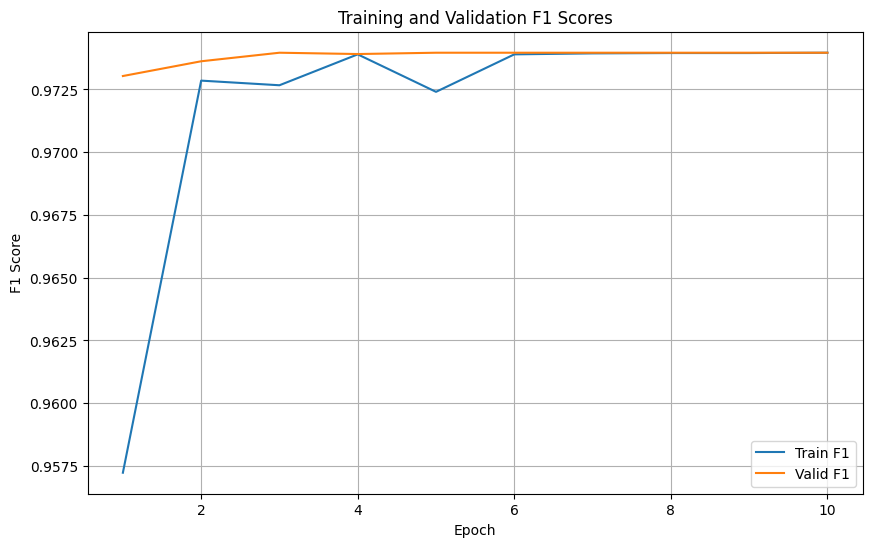

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Инициализируем модель
model = SensorMetaModel(2, 11, 1)
criterion = nn.BCEWithLogitsLoss()  # Для бинарной классификации
optimizer = optim.Adam(model.parameters(), lr=1e-3)

@torch.no_grad()
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_targets = []
    
    for batch in dataloader:
        meta_data, sensor_data, targets = batch
            
        meta_data = meta_data.float()
        sensor_data = [s.float() for s in sensor_data]
        targets = targets.float()
            
        outputs = model(meta_data, sensor_data).squeeze(1)
        preds = (torch.sigmoid(outputs) > 0.5).float()
            
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())
    
    return f1_score(all_targets, all_preds)

# Функция обучения
def train_model(model, train_dataloader, valid_dataloader, criterion, optimizer, epochs=5):
    train_f1_history = []
    valid_f1_history = []
    
    for epoch in range(epochs):
        # Обучение
        model.train()
        total_loss = 0
        all_preds = []
        all_targets = []

        for batch in train_dataloader:
            meta_data, sensor_data, targets = batch

            meta_data = meta_data.float()
            sensor_data = [s.float() for s in sensor_data]
            targets = targets.float()

            outputs = model(meta_data, sensor_data).squeeze(1)
            loss = criterion(outputs, targets)
            total_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            preds = (torch.sigmoid(outputs) > 0.5).float()
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

        # Вычисляем метрики
        train_f1 = f1_score(all_targets, all_preds)
        valid_f1 = evaluate_model(model, valid_dataloader)
        
        train_f1_history.append(train_f1)
        valid_f1_history.append(valid_f1)
        
        print(f"Epoch {epoch + 1}/{epochs}")
        print(f"Loss: {total_loss:.4f}")
        print(f"Train F1: {train_f1:.4f}")
        print(f"Valid F1: {valid_f1:.4f}")
        print("-" * 50)
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), train_f1_history, label='Train F1')
    plt.plot(range(1, epochs + 1), valid_f1_history, label='Valid F1')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.title('Training and Validation F1 Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

# Обучение модели
train_model(model, dataloader, test_dataloader, criterion, optimizer, epochs=10)

In [13]:
torch.save(model.state_dict(), 'sensor_meta_model.pth')

# Загружаем модель
loaded_model = SensorMetaModel(2, 11, 1)
loaded_model.load_state_dict(torch.load('sensor_meta_model.pth'))
loaded_model.eval()  # Переводим модель в режим оценки

/tmp/ipykernel_7864/3473959088.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('sensor_meta_model.pth'))


SensorMetaModel(
  (sensor_nets): ModuleList(
    (0-10): 11 x Sequential(
      (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): ReLU()
      (2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
      (3): ReLU()
      (4): AdaptiveAvgPool1d(output_size=1)
    )
  )
  (meta_fc): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
  )
  (final_fc): Sequential(
    (0): Linear(in_features=384, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [14]:
df_test = pd.read_csv('./test.csv')

In [17]:
df_test[['weekday', 'shift']]

,weekday,shift
0,Monday,Nachtschicht
1,Monday,Spaetschicht
2,Tuesday,Fruehschicht
3,Friday,Nachtschicht
4,Monday,Nachtschicht
...,...,...
4477,Wednesday,Spaetschicht
4478,Tuesday,Spaetschicht
4479,Wednesday,Nachtschicht
4480,Friday,Nachtschicht


In [18]:
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

# Столбцы для массива мета-данных
meta_columns = ['weekday', 'shift']

# Создание списка сенсорных данных для групп s0, s1, ..., s10
sensor_columns = {f's{i}': [] for i in range(11)}

for col in df.columns:
    for i in range(11):
        if col.startswith(f's{i}_'):
            sensor_columns[f's{i}'].append(col)

for key in sensor_columns:
    sensor_columns[key].sort()

# Кодируем `weekday` и `shift`
label_encoder = LabelEncoder()
df_test['weekday'] = label_encoder.fit_transform(df_test['weekday'].fillna('unknown'))
df_test['shift'] = label_encoder.fit_transform(df_test['shift'].fillna('unknown'))

# Заполняем `NaN` в числовых колонках
df_test.fillna(-1, inplace=True)


string_columns = df_test.select_dtypes(include=['object']).columns.tolist()

# Удаляем эти колонки
df_test = df_test.drop(columns=string_columns)
df_test = df_test.astype(float)


class TestCustomDataset(Dataset):
    def __init__(self, dataframe, meta_columns, sensor_columns):
        # Разделяем мета-данные, сенсорные данные и таргет
        self.meta_data = dataframe[meta_columns].values
        self.sensor_data = []
        
        for i in range(11):
            if sensor_columns[f's{i}']:
                self.sensor_data.append(dataframe[sensor_columns[f's{i}']].values)
        
        # Преобразуем все данные в float32
        self.meta_data = torch.tensor(self.meta_data, dtype=torch.float32)
        self.sensor_data = [torch.tensor(data, dtype=torch.float32) for data in self.sensor_data]

    def __len__(self):
        return len(self.meta_data)

    def __getitem__(self, idx):
        meta_item = self.meta_data[idx]
        sensor_items = [data[idx] for data in self.sensor_data]
        return meta_item, sensor_items

# Создание train и validation датасетов
test_dataset = TestCustomDataset(df_test, meta_columns, sensor_columns)

In [19]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Функция для предсказания
def predict(model, test_dataloader):
    model.eval()  # Переключаем модель в режим оценки
    all_preds = []
    all_meta_data = []
    all_sensor_data = []
    
    with torch.no_grad():  # Отключаем вычисление градиентов
        for batch in test_dataloader:
            meta_data, sensor_data = batch
            
            meta_data = meta_data.float()
            sensor_data = [s.float() for s in sensor_data]
            
            outputs = model(meta_data, sensor_data).squeeze(1)
            preds = (torch.sigmoid(outputs) > 0.5).float()
            
            all_preds.extend(preds.cpu().numpy())
            all_meta_data.extend(meta_data.cpu().numpy())
            all_sensor_data.append([s.cpu().numpy() for s in sensor_data])
            
    return torch.tensor(all_preds)

# Получаем предсказания
predictions = predict(model, test_dataloader)
print(f"Получено {len(predictions)} предсказаний")

Получено 4482 предсказаний


In [25]:
predictions = predictions.tolist()
df_test['status'] = predictions
df_test

,weekday,shift,s6_sensor0_millimeter_step1,s8_sensor0_millimeter_step1,s8_sensor1_millimeter_step1,s7_sensor0_newton_step1,s9_sensor0_kilonewton_step1,s7_sensor1_mikrometer_step1,s0_sensor0_kilonewton_step3,s2_sensor0_millimeter_step1,...,s0_sensor57_millimeter_step4,s2_sensor23_millimeter_step1,s2_sensor24_millimeter_step1,s8_sensor120_ml_step1,s7_sensor50_mikrometer_step1,s2_sensor25_millimeter_step1,s8_sensor121_binaer_step1,s8_sensor122_millimeter_step1,s3_sensor3_newtonmeter_step1,status
0,1.0,1.0,5886.043819,18.977389,385.890552,8865.426335,36.836737,33715.734839,-53.537243,18.211698,...,-1.000000,-1.0,151.621403,162.751891,35121.875774,224.369517,0.0,757.115280,24.208555,1.0
1,1.0,2.0,5886.043819,19.304810,393.970153,8854.226959,36.836737,32971.009772,-53.537243,19.318631,...,-1.000000,-1.0,151.806533,166.524285,33970.338864,224.295296,0.0,794.732063,24.208555,1.0
2,4.0,0.0,4606.469076,18.972192,372.268290,8872.145961,36.836737,30872.239130,-1.000000,16.401949,...,25845.838372,-1.0,231.042138,0.000000,35049.904717,221.994451,0.0,664.076681,21.980190,1.0
3,0.0,1.0,4606.469076,17.659912,361.293270,8849.747208,36.836737,31075.345966,-1.000000,18.413757,...,25845.838372,-1.0,204.198300,160.057323,33682.454636,230.529844,0.0,719.826869,24.508053,1.0
4,1.0,1.0,4606.469076,22.056700,379.851533,8867.666210,36.836737,33580.330282,-1.000000,19.327417,...,25845.838372,-1.0,201.421351,161.135150,34330.194148,225.853933,0.0,709.282495,26.253564,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,5.0,2.0,5886.043819,17.470216,381.919690,8843.027582,36.836737,33783.437118,-53.537243,19.476765,...,-1.000000,-1.0,156.990171,164.368631,36345.383742,232.311144,0.0,792.469948,22.804163,1.0
4478,4.0,2.0,4606.469076,20.723631,424.027370,8856.466834,36.836737,31549.261918,-1.000000,20.214721,...,25845.838372,-1.0,199.014662,163.829718,33826.396750,226.150817,0.0,795.498263,21.006538,1.0
4479,5.0,1.0,5886.043819,18.727926,371.358301,8851.987083,36.836737,32835.605215,-53.537243,18.396187,...,-1.000000,-1.0,151.436273,164.368631,35121.875774,215.463019,0.0,712.347296,19.185728,1.0
4480,0.0,1.0,5886.043819,23.348191,404.834872,8863.186460,36.836737,31616.964197,-53.537243,18.404972,...,-1.000000,-1.0,205.309079,168.141026,32458.946668,216.502111,0.0,850.774136,26.253564,1.0


In [26]:
df_test['status'].value_counts()

status
1.0    4481
0.0       1
Name: count, dtype: int64